Dataset Shape: (10129, 19)

Data Types:
 Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object

Missing Values:
 Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Soun

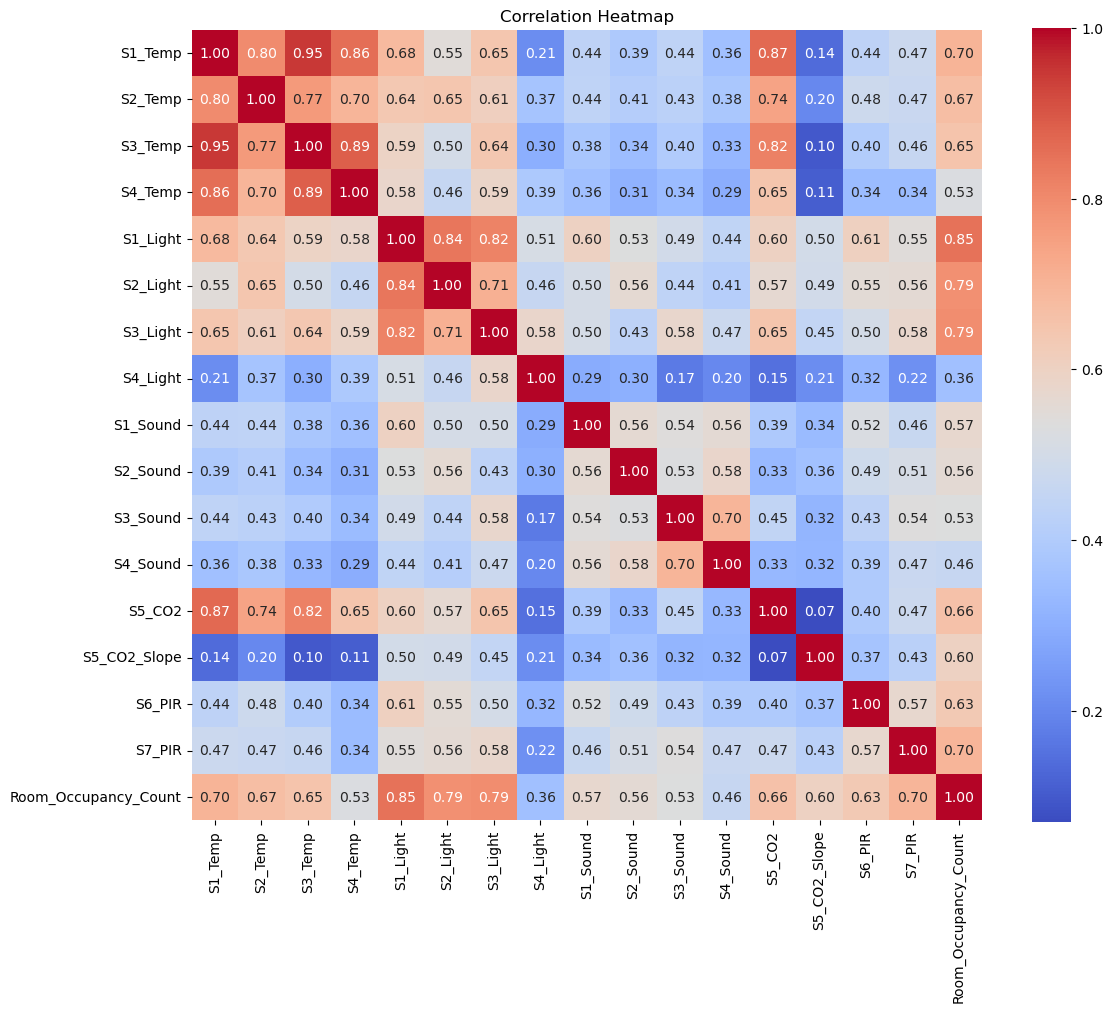

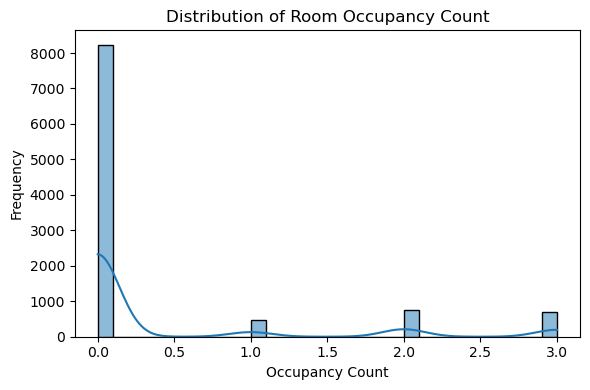

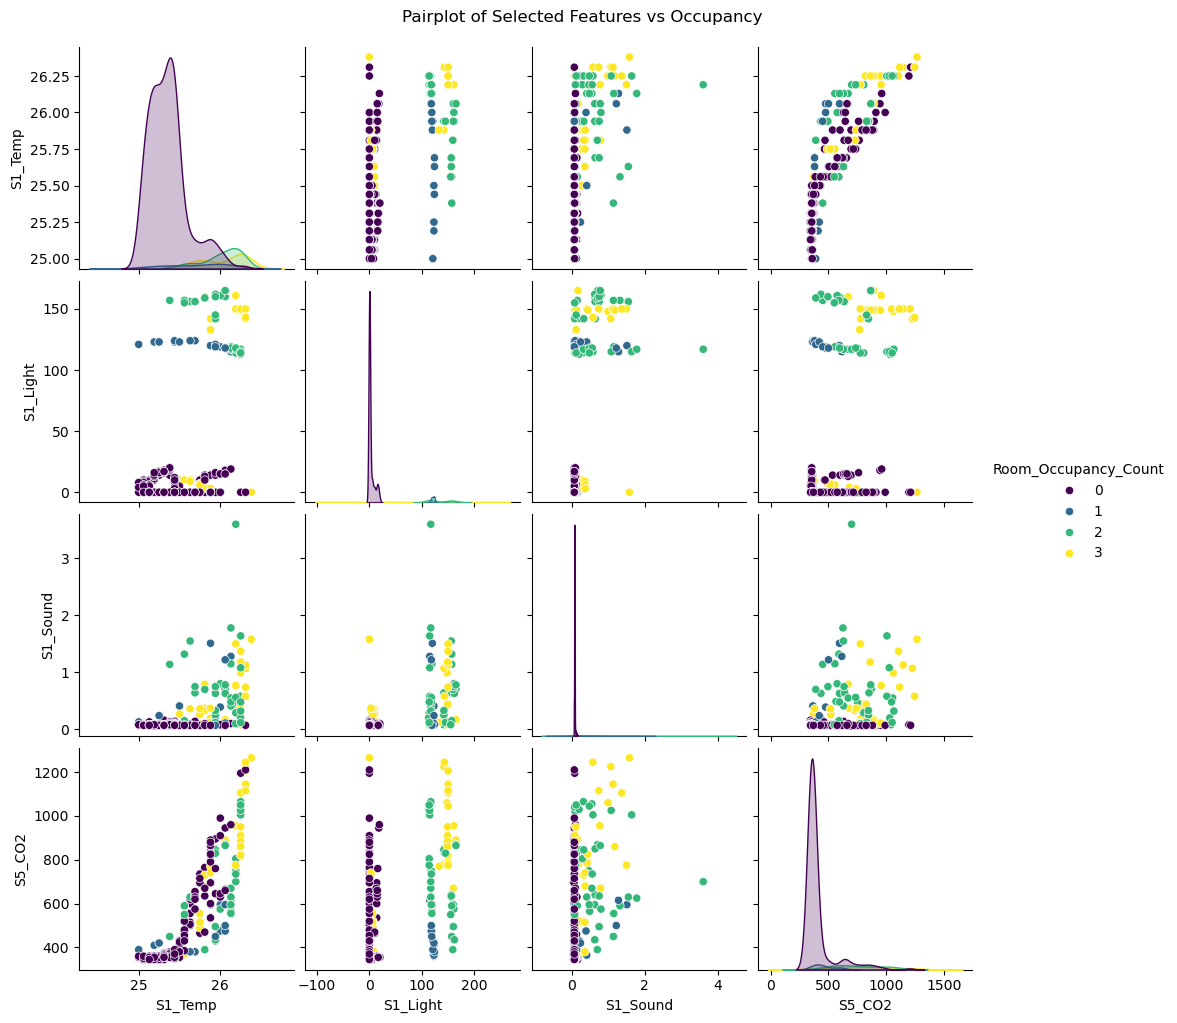

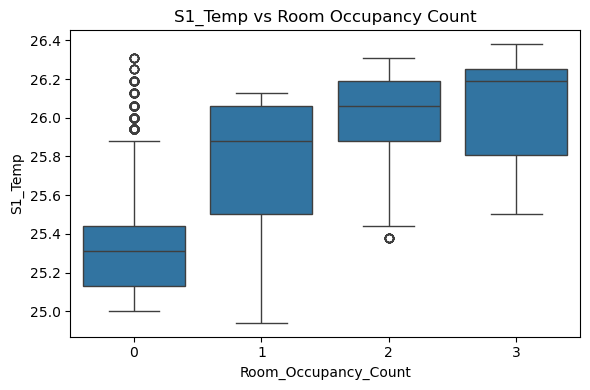

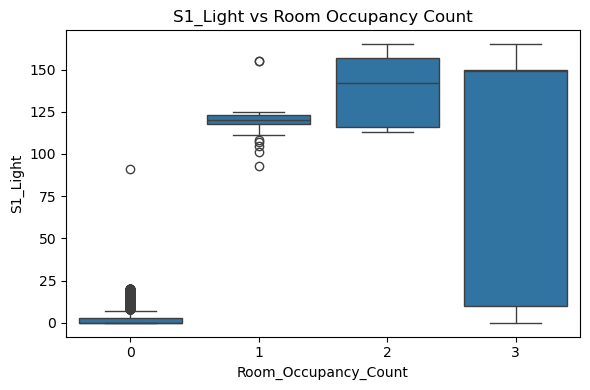

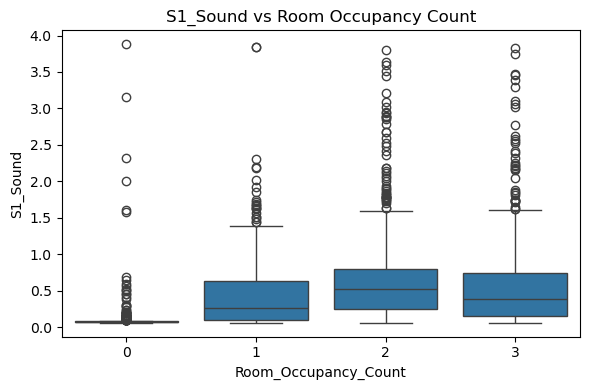

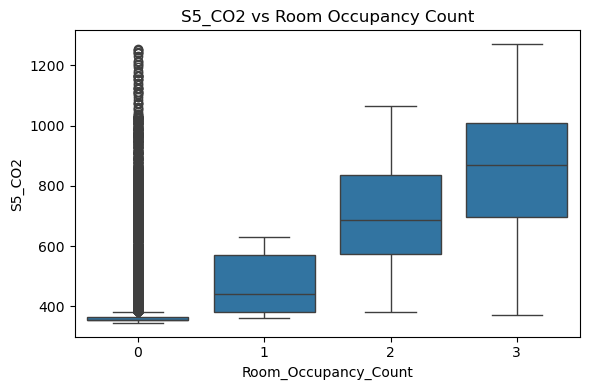

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("Occupancy_Estimation.csv")

# 1. Dataset Overview
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

# 2. Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# 3. Distribution of Target Variable
plt.figure(figsize=(6, 4))
sns.histplot(df["Room_Occupancy_Count"], bins=30, kde=True)
plt.title("Distribution of Room Occupancy Count")
plt.xlabel("Occupancy Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 4. Pairplot (subset for performance)
sample_df = df.sample(500)  # sample to reduce plot load
sns.pairplot(sample_df[['S1_Temp', 'S1_Light', 'S1_Sound', 'S5_CO2', 'Room_Occupancy_Count']],
             hue='Room_Occupancy_Count', palette='viridis')
plt.suptitle("Pairplot of Selected Features vs Occupancy", y=1.02)
plt.show()

# 5. Boxplots for Sensor Readings vs Occupancy
features = ['S1_Temp', 'S1_Light', 'S1_Sound', 'S5_CO2']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Room_Occupancy_Count', y=feature, data=df)
    plt.title(f"{feature} vs Room Occupancy Count")
    plt.tight_layout()
    plt.show()


In [25]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Occupancy_Estimation.CSV")

# Keep only numeric columns for outlier detection
df_numeric = df.select_dtypes(include='number')


In [27]:
import numpy as np
from scipy.stats import zscore

# Calculate Z-scores
z_scores = np.abs(zscore(df_numeric))

# Threshold: z > 3 is often considered an outlier
outliers_z = (z_scores > 3)

# Count of outliers per column
print("Z-score Outlier Counts:")
print(pd.DataFrame(outliers_z, columns=df_numeric.columns).sum())


Z-score Outlier Counts:
S1_Temp                   0
S2_Temp                 241
S3_Temp                   0
S4_Temp                   0
S1_Light                  0
S2_Light                837
S3_Light                155
S4_Light                 29
S1_Sound                229
S2_Sound                187
S3_Sound                246
S4_Sound                201
S5_CO2                  176
S5_CO2_Slope            211
S6_PIR                  913
S7_PIR                  806
Room_Occupancy_Count      0
dtype: int64


In [29]:
# Calculate IQR for each column
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Find outliers
outliers_iqr = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR)))

print("\nIQR Outlier Counts:")
print(outliers_iqr.sum())



IQR Outlier Counts:
S1_Temp                  162
S2_Temp                  948
S3_Temp                    0
S4_Temp                    0
S1_Light                1716
S2_Light                1017
S3_Light                 950
S4_Light                 543
S1_Sound                1772
S2_Sound                1703
S3_Sound                1671
S4_Sound                 721
S5_CO2                  1657
S5_CO2_Slope            4033
S6_PIR                   913
S7_PIR                   806
Room_Occupancy_Count    1901
dtype: int64


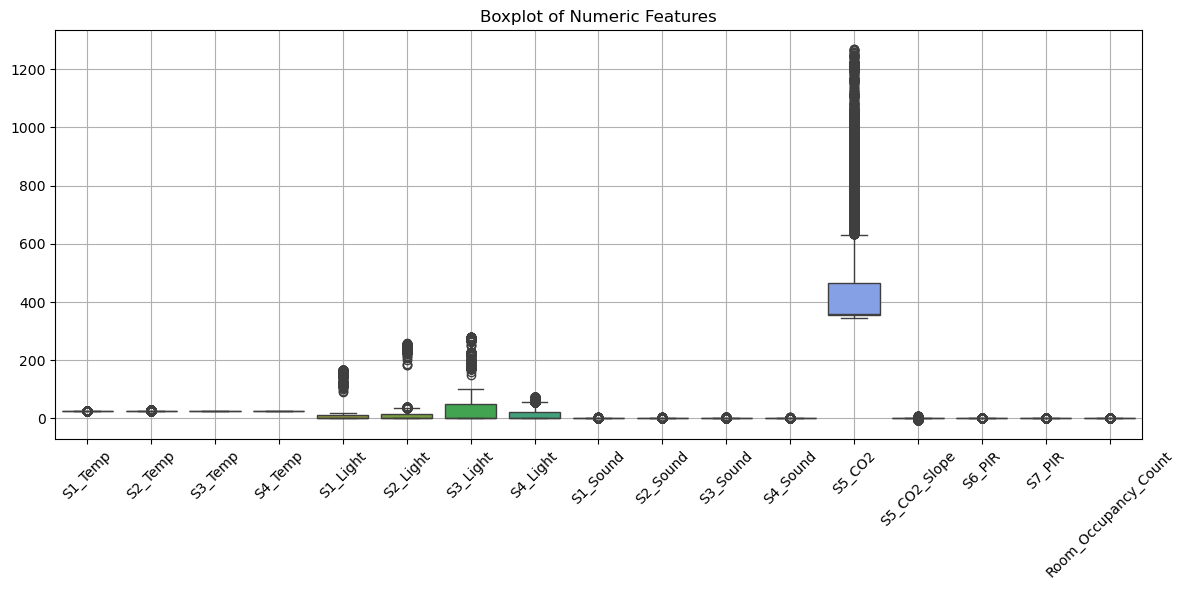

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Occupancy_Estimation.CSV")

# Keep only numeric columns
df_numeric = df.select_dtypes(include='number')

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric)
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Numeric Columns:
 ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count']

Missing values:
 S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

Z-Score Outlier Counts:
 S1_Temp                   0
S2_Temp                 241
S3_Temp                   0
S4_Temp                   0
S1_Light                  0
S2_Light                837
S3_Light                155
S4_Light                 29
S1_Sound                229
S2_Sound            

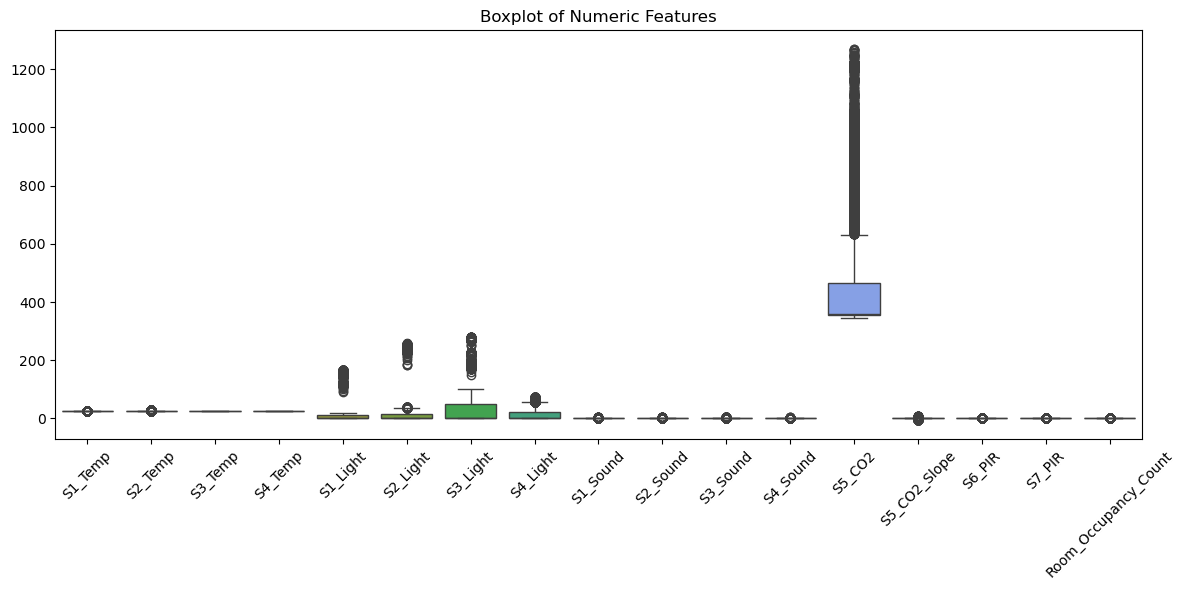

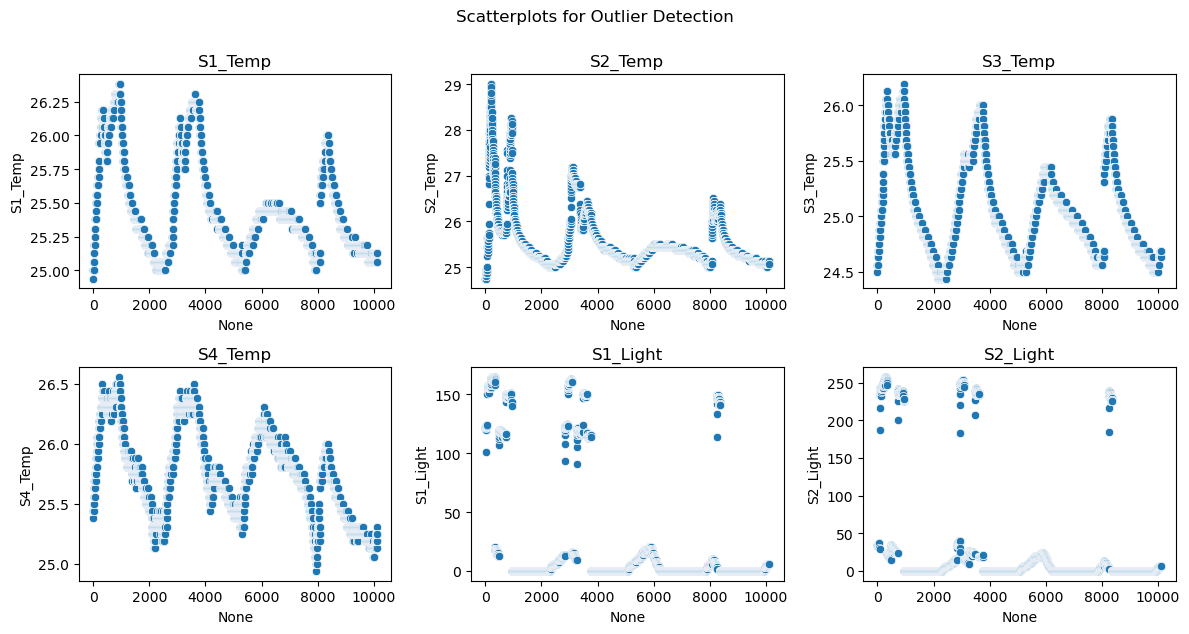

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load data
df = pd.read_csv("Occupancy_Estimation.CSV")

# Drop Date and Time columns if they exist
df = df.drop(columns=['Date', 'Time'], errors='ignore')

# Keep only numeric columns
df = df.select_dtypes(include='number')

print("Numeric Columns:\n", df.columns.tolist())

# Check for NaN values
print("\nMissing values:\n", df.isnull().sum())

# Drop rows with NaNs (optional safety)
df = df.dropna()

try:
    # Z-Score method
    z_scores = np.abs(zscore(df))
    outliers_z = (z_scores > 3)
    print("\nZ-Score Outlier Counts:\n", outliers_z.sum())

    # IQR method
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
    print("\nIQR Outlier Counts:\n", outliers_iqr.sum())

    # Boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df)
    plt.title("Boxplot of Numeric Features")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Scatterplots
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(df.columns[:6]):  # plot up to 6 features
        plt.subplot(2, 3, i+1)
        sns.scatterplot(x=df.index, y=df[col])
        plt.title(col)
        plt.tight_layout()
    plt.suptitle("Scatterplots for Outlier Detection", y=1.05)
    plt.show()

except ValueError as ve:
    print("\n❌ ValueError encountered:")
    print(ve)
